In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# data

In [2]:
# load raw data
df = pd.read_csv("data\SpotifyFeatures.csv")

## data set

for the following analyses we use data on ~233k Spotify songs from [Zaheen Hamidani](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db)

it comprises the following information for each song:
- **genre**: genre of the track; in total there are 26 genres
- **artist name**: name of the artist
- **track name**: name of the track
- **track id**: Spotify ID for the track	
- **popularity**: measure between 0 and 100, with 100 being the most popular track; the popularity is calculated by an algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are
- **acousticness**: confidence measure from 0 to 1 of whether the track is acoustic; 1 represents high confidence of the track being acoustic
- **danceability**: danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity; a value of 0 is least danceable and 1 is most danceable
- **duration**: duration of the track in milliseconds
- **energy**: measure from 0 to 1 representing a perceptual measure of intensity and activity; typically, energetic tracks feel fast, loud, and noisy; for example, death metal has high energy, while a Bach prelude scores low on the scale; perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy          
- **instrumentalness**: measure from 0 to 1 representing the absence of vocal elements; “ooh” and “aah” sounds are treated as instrumental in this context; rap or spoken word tracks are clearly “vocal”; the closer the instrumentalness value is to 1, the greater likelihood the track contains no vocal content; values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1
- **key**: key the track is in; integers map to pitches using standard pitch class notation, e.g., 0 = C, 1 = C♯/D♭, 2 = D, and so on            
- **liveness**: detects the presence of an audience in the recording; higher liveness values represent an increased probability that the track was performed live; a value above 0.8 provides strong likelihood that the track is live        
- **loudness**: the overall loudness of a track in decibels (dB); loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks; Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude); values typical range between -60 and 0 db          
- **mode**: indicates the modality (major or minor) of a track
- **speechiness**: detects the presence of spoken words in a track; the more exclusively speech-like the recording (e.g., talk show, audio book, poetry), the closer to 1.0 the attribute value; values above 0.66 describe tracks that are probably made entirely of spoken words; values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music; values below 0.33 most likely represent music and other non-speech-like tracks       
- **tempo**: overall estimated tempo of a track in beats per minute (BPM); in musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration          
- **time signature: estimated overall time signature of a track; the time signature (meter) is a notational convention to specify how many beats are in each bar (or measure)   
- **valence**: measure from 0 to 1 describing the musical positiveness; tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry).

note that the underlying data set is labeled (see genre feature)

in order to enable full unsupervised learning and semi-supervised learning we will have two different version of the data (labeled and unlabeled after having carried out the preprocessing steps the labels of interest are represented by the genre column

the labeled data might be helpful in intuitively evaluating the methods that will be used

In [3]:
# print data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [4]:
# display first rows
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


## data preprocessing

### checking for data impurities

let's have a look at the features and their unique values ...

In [5]:
for i in list(df.columns):
    print(f"feature: {i}")
    print(df[i].unique())
    print(f"unique values: {len(df[i].unique())}")
    print("\n")

feature: genre
['Movie' 'R&B' 'A Capella' 'Alternative' 'Country' 'Dance' 'Electronic'
 'Anime' 'Folk' 'Blues' 'Opera' 'Hip-Hop' "Children's Music"
 'Children’s Music' 'Rap' 'Indie' 'Classical' 'Pop' 'Reggae' 'Reggaeton'
 'Jazz' 'Rock' 'Ska' 'Comedy' 'Soul' 'Soundtrack' 'World']
unique values: 27


feature: artist_name
['Henri Salvador' 'Martin & les fées' 'Joseph Williams' ... 'Dharmasoul'
 'Swim' 'Jr Thomas & The Volcanos']
unique values: 14564


feature: track_name
["C'est beau de faire un Show" "Perdu d'avance (par Gad Elmaleh)"
 "Don't Let Me Be Lonely Tonight" ... 'P.O.P.' 'Burning Fire'
 "You Don't Have To Hurt No More"]
unique values: 148615


feature: track_id
['0BRjO6ga9RKCKjfDqeFgWV' '0BjC1NfoEOOusryehmNudP'
 '0CoSDzoNIKCRs124s9uTVy' ... '2iZf3EUedz9MPqbAvXdpdA'
 '1qWZdkBl4UVPj9lK6HuuFM' '34XO9RwPMKjbvRry54QzWn']
unique values: 176774


feature: popularity
[  0   1   3   4   2  15  10   8   5   6   7  11  65  63  62  61  68  64
  66  60  69  71  76  67  70  72  57  59  56  2

we can make a couple of surprising observations:
- a) there are 27 unique values for the genre, but we know from the data description it should be 26
- b) there are only ~177k unique track IDs, so 1 row (of 233k rows in total) does not neccesarily represent 1 unique song

a) if we look at the genre values again, we see that there are 2 distinctive values for "Children's Music" and "Children’s Music" only varying in the choice of the apostrophe, so we can easily fix this issue by harmonizing the use of one of those apostrophes ...

In [6]:
# harmonizing all variations of the children's music genre
df["genre"] = np.where((df.genre == "Children’s Music"),"Children's Music", df.genre)

b) having less unique track IDs than rows means that some tracks are not unique in the data

In [7]:
# picking the first duplicate track ID
duplicates = df["track_id"].duplicated()
duplicate_id = df[duplicates == True]["track_id"].iloc[0]

# get data entries for that track ID
df[df["track_id"] == duplicate_id]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
257,R&B,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
1348,Alternative,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
77710,Children's Music,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
93651,Indie,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
113770,Pop,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7


we can see that the same song appears 5 times in the data as it was categorized into 5 different genres

in order to make sure that each row in the data represents a unique track we decided to only account for the first appearance (from top to bottom) of each track, meaning that all the other entries for the same song except the first one, will be removed

in doing so, we are aware that information on multi-genre affiliation of songs will be lost, however, the uniqueness of data instances shall be safeguarded in the context of unsupervised learning

In [8]:
# removing all duplicate appearances of tracks
df = df.drop_duplicates(subset="track_id", keep="first")

# reset index
df = df.reset_index(drop=True)

# check result
df[df["track_id"] == duplicate_id]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
257,R&B,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7


let's now check how balanced the data set is with regards to the cleaned genres ...

Text(0, 0.5, 'Occurences')

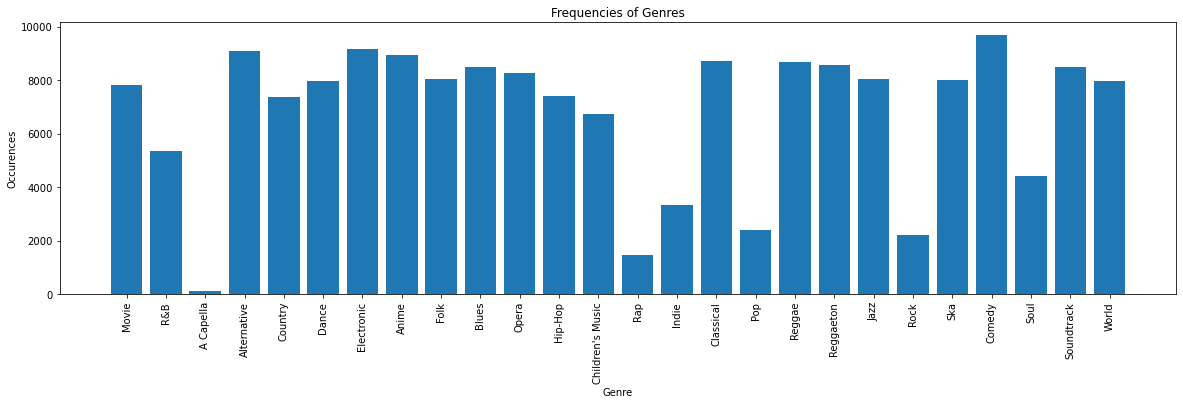

In [9]:
# calculate % of genre affiliation
genres = df["genre"].unique()

counts = {}

for genre in genres:
    counts[genre] = df[df["genre"] == genre]["genre"].count()

# plot the distribution over genres
fig = plt.figure(figsize=(20,5))
plt.bar(list(counts.keys()), counts.values())
plt.title("Frequencies of Genres")
plt.xlabel("Genre")
plt.xticks(rotation=90)
plt.ylabel("Occurences")

### feature selection

before applying any dimensionality reduction algorithms, we need to decide which features to include in our preprocessed data set

problematic features are:
- a) key: categorical variable with 12 categories 
- b) time signature: categorical variable with 5 categories
- c) mode: binary categorical variable
- d) note that the features artist name, track name and track ID will be moved into an separate auxiliary data set in case this information can be useful at a later stage for manually checking the resulting clusters by using this information  
- e) also we need to seperate the labels from the data

as we want to avoid one-hote-encoding-related high dimensionality, key and time signature, a) and b), can be dropped ...

In [10]:
# dropping key and time signature features
df = df.drop(["key", "time_signature"], axis=1)

for the mode, c), however, we can use one-hot-encoding (major is represented by 1 and minor is represented by 0) without adding a new column ... 

In [11]:
# one-hot-encoding mode feature
ohe = pd.get_dummies(df["mode"])
ohe = ohe.rename(columns = {"Major": "mode_ohe"})
ohe = ohe["mode_ohe"]
ohe

# drop original mode feature
if "mode" in list(df.columns):
    del df["mode"]

# concatenate one-hot-encoding colum
df = pd.concat([df, ohe], axis = 1)

now we can move the artist name, track name, track ID (all d)) and genre (e)) to a separate auxiliary data set ...

In [12]:
# create separate table with additional information
df_aux = df[["artist_name", "track_name", "track_id", "genre"]]

# save auxiliary table
df_aux.to_csv("data/auxiliary_data.csv", index = False)

# drop corresponding features, except label
df = df.drop(["artist_name", "track_name", "track_id"], axis=1)

also we need to separate the label, e), from the data ...

In [13]:
# create table for labels
labels = df[["genre"]]

# drop labels from data set
df = df.drop(["genre"], axis=1)

### standardization

in this step we need to standardize the variables by rescaling them so that they’ll have the properties of a standard normal distribution with $\mu = 0$ and $\sigma = 1$ 

note that we do not touch the binary mode variable (0, 1) as it can be seen as already standardized, more specifically, normalized according to to Min-Max scaling ...

In [14]:
# standardization of all continuous variables
sc = StandardScaler()
cont_var = df.iloc[:,:-1]
X = pd.DataFrame(sc.fit_transform(cont_var), columns = cont_var.columns)

# concatenate the binary variable
X = pd.concat([X, df.iloc[:,-1]], axis = 1)

# save preprocessed data
X.to_csv("data/prepocessed_data.csv", index = False)

now we can take a look at the final preprocessed data ...

In [15]:
# display first rows of preprocessed data
X.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode_ohe
0,-2.085747,0.564740,-0.798733,-1.047822,1.279646,-0.532841,0.575611,1.299283,-0.366515,1.588677,1.353170,1
1,-2.028246,-0.431708,0.257016,-0.756663,0.652467,-0.532841,-0.348444,0.715907,-0.198661,1.813226,1.360637,0
2,-1.913244,1.495668,0.640447,-0.504626,-1.544471,-0.532841,-0.575904,-0.585001,-0.446282,-0.565544,-0.312134,0
3,-2.085747,0.815900,-1.581352,-0.641318,-0.837536,-0.532841,-0.597228,-0.319034,-0.430133,1.741558,-0.838608,1
4,-1.855743,1.490208,-1.103376,-1.176146,-1.203692,-0.151959,-0.106768,-1.721889,-0.400281,0.746124,-0.229989,1
